# Plot the ellipsis and the query time

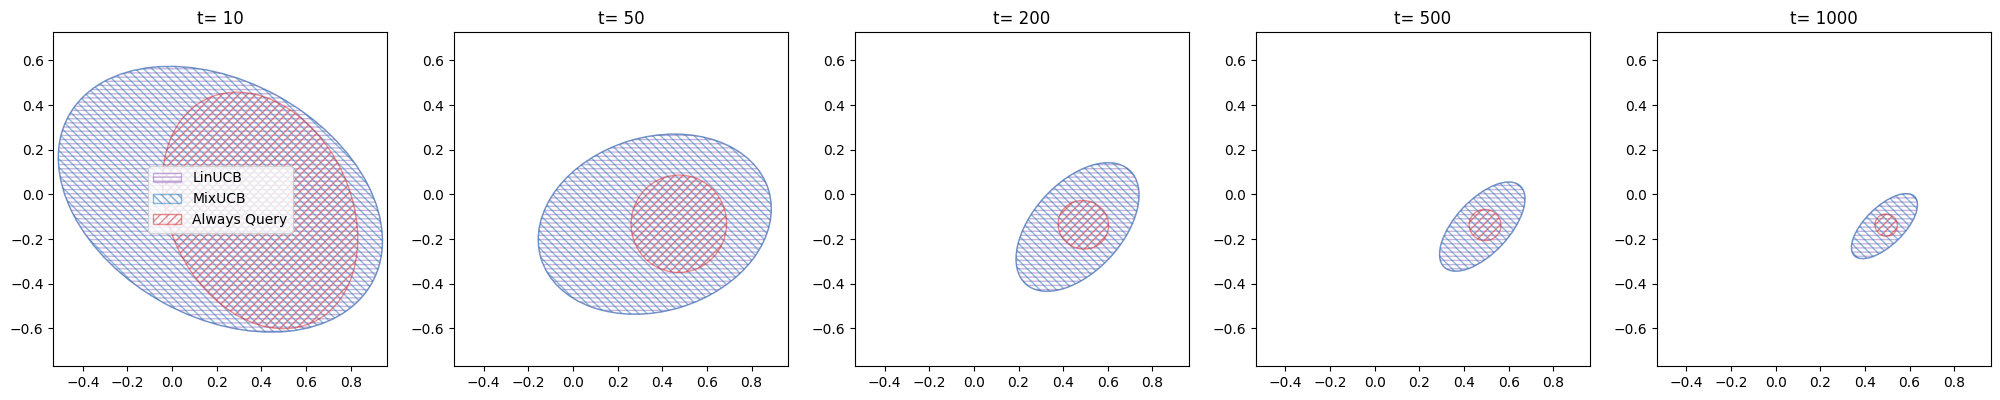

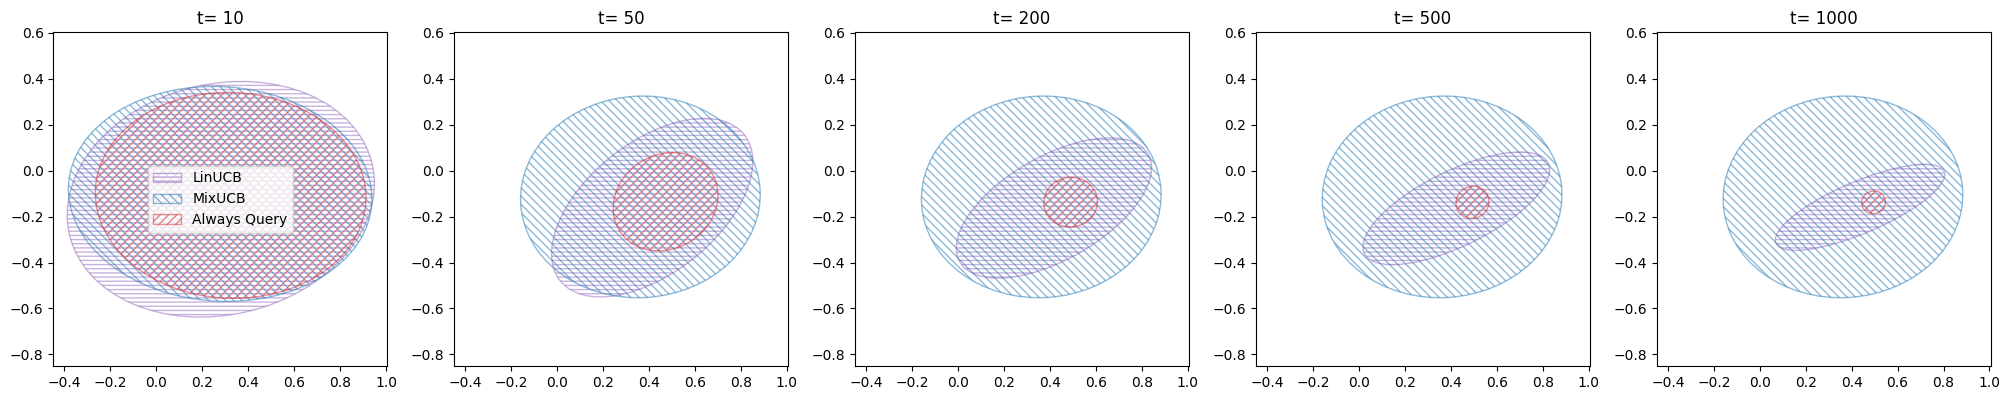

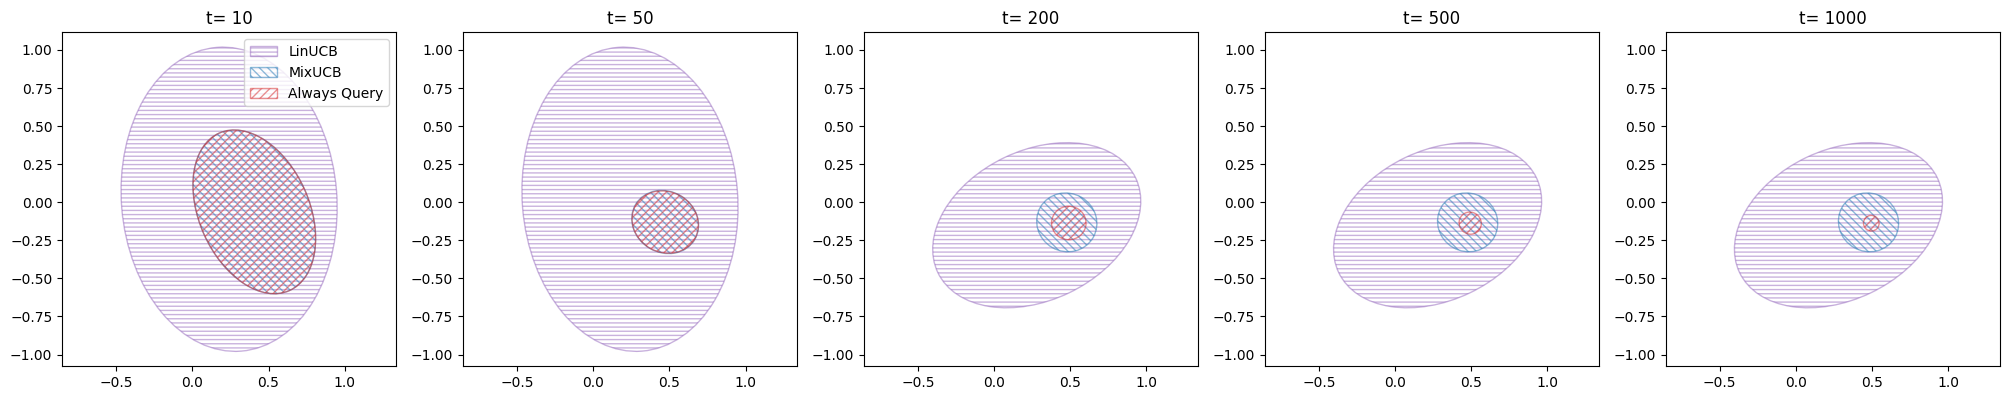

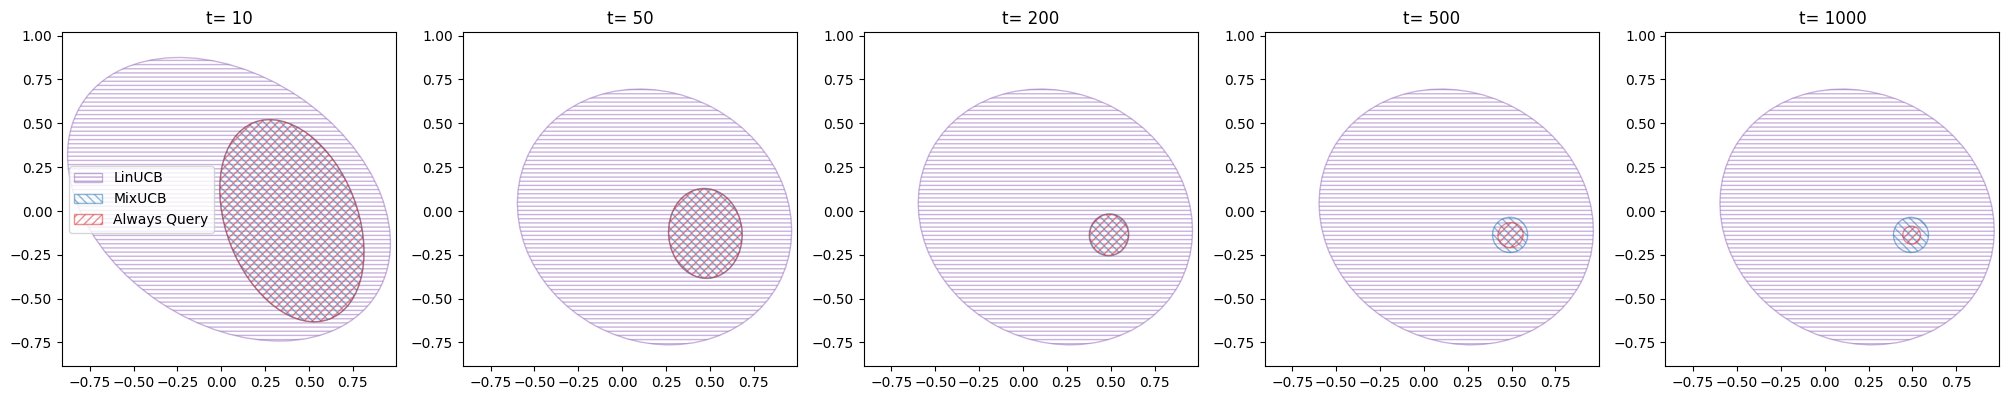

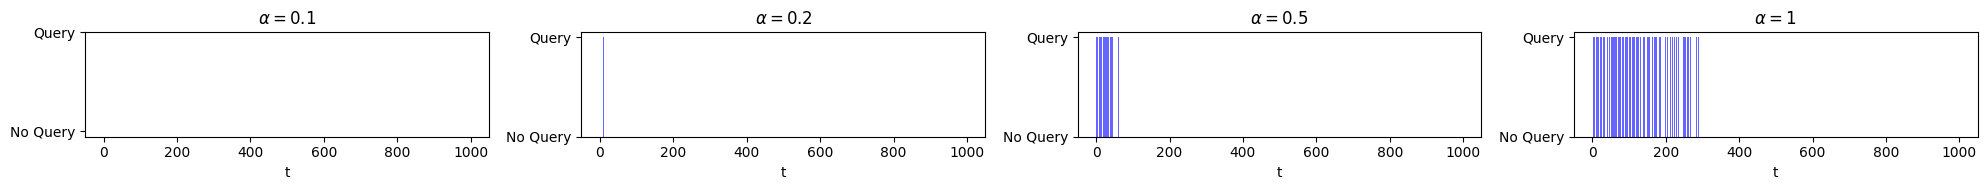

In [3]:
import numpy as np
from utils.plot import plot_average_rewards, plot_query_timelines, plot_ellipses_grid, plot_cumulative_rewards
from utils.run_simulation import run_simulation_mixucbIII
from utils.linucb import initialize_ucb_algorithms
from utils.get_data import ContextGenerator
import matplotlib.pyplot as plt
import os
np.random.seed(42)

n_features = 2
n_actions = 30
noise_std = 0
alpha_values = [0.1, 0.2, 0.5, 1]
delta = 0.2
lambda_ = 1
T = 1000
action_plot = 0
plot_rounds = [10, 50, 200, 500, 1000]
colors = {
    'linucb': 'tab:purple',
    'mixucb': 'tab:blue',
    'always_query': 'tab:red'
}
Figure_dir = 'Figures/'
ellipses_figure_name = 'ellipses'
true_weights = np.random.randn(n_actions, n_features)
generator = ContextGenerator(true_weights=true_weights, noise_std=noise_std)

all_rewards = []
labels = []
query_data = []
cumulative_rewards_linucb = []
cumulative_rewards_mixucb = []
cumulative_rewards_always_query = []
thetas_data = []
covs_data = []
# Create a grid of subplots

    


for row_idx, alpha in enumerate(alpha_values):
    fig, axs = plt.subplots(1, len(plot_rounds), figsize=(5 * len(plot_rounds), 5))
    # Initialize UCB algorithms
    mixucb, linucb, always_query_ucb, online_lr_oracle, online_sq_oracle = initialize_ucb_algorithms(n_actions, n_features, alpha, lambda_)

    # Run simulation for the current parameter
    cumulative_reward_mixucb, cumulative_reward_linucb, cumulative_reward_always_query, q, total_num_queries, theta_data, cov_data = run_simulation_mixucbIII(
        T, delta, generator, mixucb, linucb, always_query_ucb, plot_rounds, action_plot
    )

    query_data.append(q)
    cumulative_rewards_mixucb.append(cumulative_reward_mixucb)
    cumulative_rewards_linucb.append(cumulative_reward_linucb)
    cumulative_rewards_always_query.append(cumulative_reward_always_query)
    # Plot ellipses for this parameter across different rounds
    
    plot_ellipses_grid(axs, plot_rounds, alpha_values, theta_data, cov_data, colors)
    fig.savefig(os.path.join(Figure_dir, f'{ellipses_figure_name}_alpha{alpha}.jpg'), format='jpg', dpi=300, bbox_inches='tight')
    plt.show()
fig, axs = plt.subplots(1, len(alpha_values), figsize=(20, 2))
plot_query_timelines(axs, query_data, alpha_values)
fig.savefig(os.path.join(Figure_dir, f'query_alpha.jpg'), format='jpg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


# Plot the reward (averged over 5 runs)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jsun/Programs/MixUCB/Figures/average_rewards_alpha.jpg'

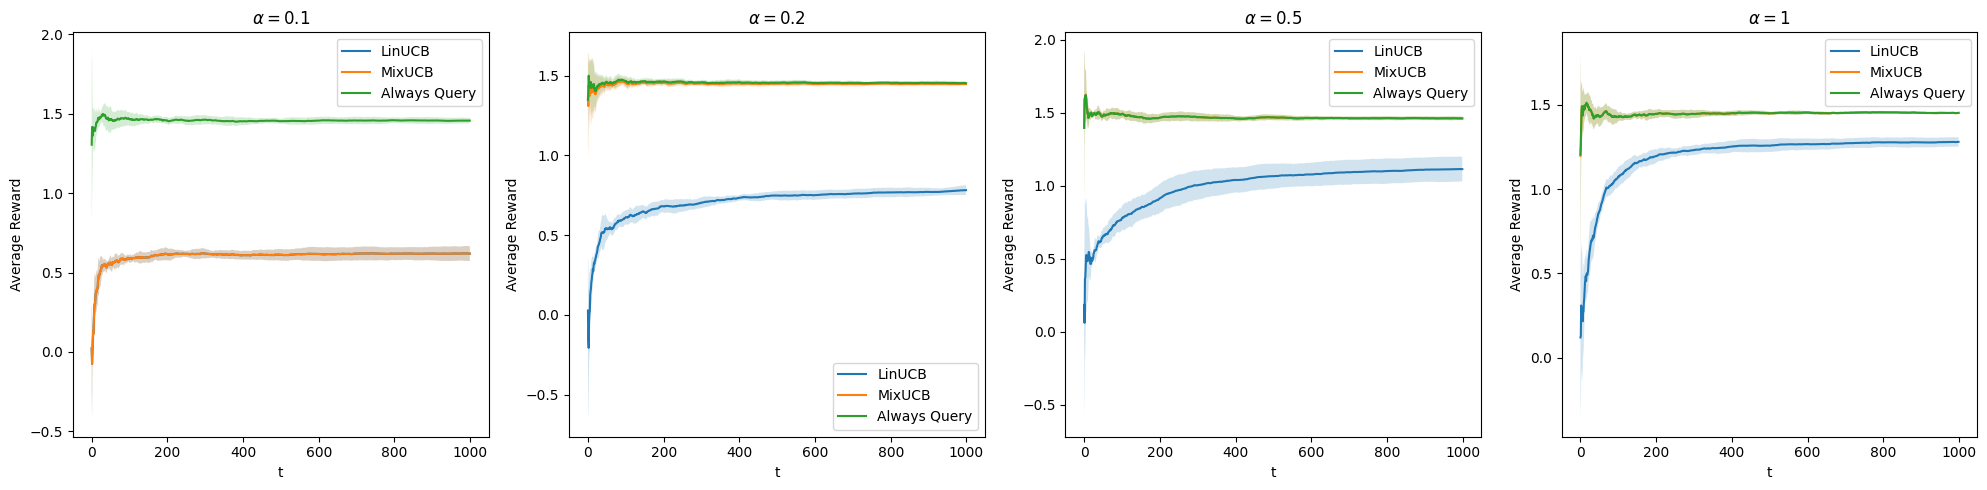

In [2]:
import numpy as np
from utils.plot import plot_average_rewards, plot_query_timelines, plot_ellipses_grid, plot_cumulative_rewards
from utils.run_simulation import run_simulation_mixucbIII
from utils.linucb import initialize_ucb_algorithms
from utils.get_data import ContextGenerator
import matplotlib.pyplot as plt
import os
np.random.seed(42)

n_features = 2
n_actions = 30
noise_std = 0
alpha_values = [0.1, 0.2, 0.5, 1]
delta = 0.2
lambda_ = 1
T = 1000
action_plot = 0
plot_rounds = [10, 50, 200, 500, 1000]
colors = {
    'linucb': 'tab:purple',
    'mixucb': 'tab:blue',
    'always_query': 'tab:red'
}
Figure_dir = 'Figures/'
ellipses_figure_name = 'ellipses'
if not os.path.exists(Figure_dir):
    os.makedirs(Figure_dir)
true_weights = np.random.randn(n_actions, n_features)
generator = ContextGenerator(true_weights=true_weights, noise_std=noise_std)

all_rewards = []
labels = []
query_data = []
cumulative_rewards_linucb = []
cumulative_rewards_mixucb = []
cumulative_rewards_always_query = []

cumulative_rewards_linucb_std = []
cumulative_rewards_mixucb_std = []
cumulative_rewards_always_query_std = []
thetas_data = []
covs_data = []
# Create a grid of subplots

    


for row_idx, alpha in enumerate(alpha_values):
    cumulative_rewards_mixucb_ = []
    cumulative_rewards_linucb_ = []
    cumulative_rewards_always_query_ = []
    for rep_id in range(5):
        mixucb, linucb, always_query_ucb, _, _ = initialize_ucb_algorithms(n_actions, n_features, alpha, lambda_)

        # Run simulation for the current parameter
        cumulative_reward_mixucb, cumulative_reward_linucb, cumulative_reward_always_query, q, total_num_queries, theta_data, cov_data = run_simulation_mixucbIII(
            T, delta, generator, mixucb, linucb, always_query_ucb, plot_rounds, action_plot
        )
        cumulative_rewards_mixucb_.append(cumulative_reward_mixucb)
        cumulative_rewards_linucb_.append(cumulative_reward_linucb)
        cumulative_rewards_always_query_.append(cumulative_reward_always_query)

        
    cumulative_rewards_mixucb.append(np.mean(cumulative_rewards_mixucb_, axis=0))
    cumulative_rewards_linucb.append(np.mean(cumulative_rewards_linucb_, axis=0))
    cumulative_rewards_always_query.append(np.mean(cumulative_rewards_always_query_, axis=0))
    
    cumulative_rewards_linucb_std.append(np.std(cumulative_rewards_linucb_, axis=0))
    cumulative_rewards_mixucb_std.append(np.std(cumulative_rewards_mixucb_, axis=0))
    cumulative_rewards_always_query_std.append(np.std(cumulative_rewards_always_query_, axis=0))
        
    


cumulative_rewards = {
    'LinUCB': cumulative_rewards_linucb,
    'MixUCB': cumulative_rewards_mixucb,
    'Always Query': cumulative_rewards_always_query
}
cumulative_rewards_std = {
    'LinUCB': cumulative_rewards_linucb_std,
    'MixUCB': cumulative_rewards_mixucb_std,
    'Always Query': cumulative_rewards_always_query_std
}
# Create a 1 by m grid of subplots for average rewards
fig, axs = plt.subplots(1, len(alpha_values), figsize=(20, 5))

# Plot average rewards
plot_average_rewards(axs, cumulative_rewards, alpha_values, cumulative_rewards_std)
plt.tight_layout()
fig.savefig(os.path.join(Figure_dir, f'average_rewards_alpha.jpg'), format='jpg', dpi=300, bbox_inches='tight')
plt.show()

fig, axs = plt.subplots(1, len(alpha_values), figsize=(20, 5))
plot_cumulative_rewards(axs, cumulative_rewards, alpha_values, cumulative_rewards_std)
plt.tight_layout()
fig.savefig(os.path.join(Figure_dir, f'cumulative_rewards_alpha.jpg'), format='jpg', dpi=300, bbox_inches='tight')
plt.show()